<a href="https://colab.research.google.com/github/vinayshanbhag/math/blob/master/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Clustering

k-Means is an unsupervised algorithm used for clustering. Clustering is a technique that allows us to find groups of similar objects that are more related to each other than others. As an unsupervised learning technique, it allows us to discover hidden structures in unlabeled data. The k-means algorithm belongs to the category of **prototype-based clustering**. Prototype-based clustering means that each cluster is represented by a prototype, which is either the **centroid** (average) in case of continuous features or the **mediod** in case of categorical features.

Pros:

- Computationally efficient

Cons:

- Number of clusters, *k*, must be specified *a priori* 
- Results of k-means clustering algorithm are sensitive to initial centroids
- Clusters must be linearly separable

In [180]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Create example dataset with 150 randomly generated points, roughly grouped into 3 regions

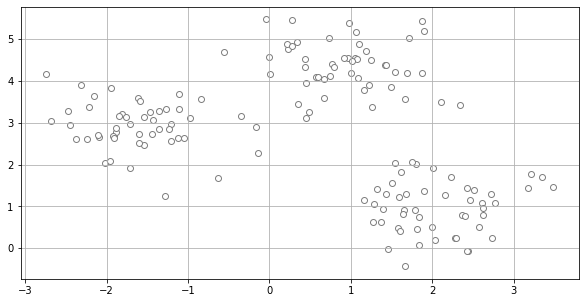

In [181]:
X,y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=.6,
                 shuffle=True,
                 random_state=0
                )
plt.figure(figsize=(10,5));
plt.scatter(X[:,0],X[:,1],color='white',marker='o',edgecolor='tab:gray');
plt.grid();

The target class *y* is provided by the ```make_blobs``` function. This is not required for k-means, and is usually not available in real-world applications.


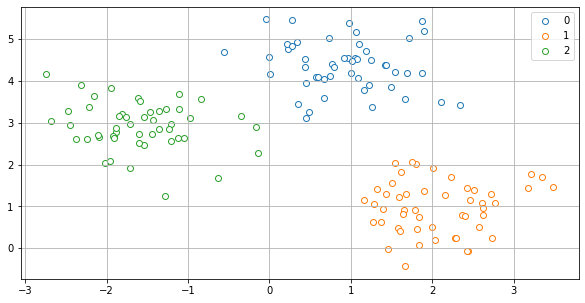

In [182]:
plt.figure(figsize=(10,5));
plt.scatter(X[y==0][:,0],X[y==0][:,1],color='white',marker='o',edgecolor='tab:blue',label='0');
plt.scatter(X[y==1][:,0],X[y==1][:,1],color='white',marker='o',edgecolor='tab:orange',label='1');
plt.scatter(X[y==2][:,0],X[y==2][:,1],color='white',marker='o',edgecolor='tab:green',label='2');
plt.legend();
plt.grid();

k-means algorithm:

1. Randomly pick *k* centroids from the examples as initial cluster centers.
2. Assign each point in the dataset to the nearest centroid.
3. Re-compute the *k* centroids based on actual data points assigned to it in step 2.
4. Repeat steps 2,3 until convergence, or max iterations is reached.

> Note: This is very similar to [Expectation&ndash;Maximization](https://github.com/vinayshanbhag/math/blob/master/Expectation_Maximization.ipynb). Instead of assigning a range of probabilities, here, each example is assigned to one class or another. The k-means algorithm differs in the method used for calculating distance. K-means uses **euclidean distance**, while EM uses statistical methods.

We can define similarity as the opposite of distance. The distance being the **Euclidean distance** between a centroid and the sample from the dataset.

The squared Euclidean distance between two points x an y in m-dimensional space is given by -

$d(x,y) = \displaystyle\sum_{j=1}^{m}(x_j-y_j)^2 = \|x-y\|^{2}_{2}$

To see how this works-

Pick a random point $k_0$ (blue)

Find 10 nearest points and highlight in blue


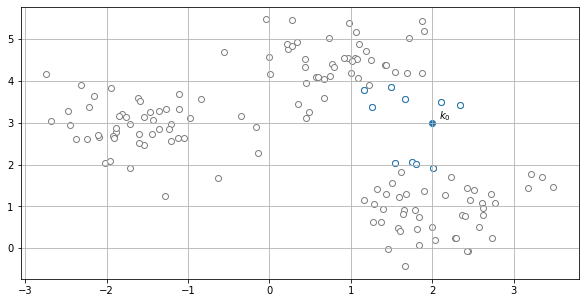

In [183]:
k0 = np.array([2,3])
offset = (X.max()-X.min())/100
dist = np.linalg.norm(X-k0, axis=1)
plt.figure(figsize=(10,5));
plt.scatter(k0[0],k0[1],color='tab:blue');
plt.text(k0[0]+offset,k0[1]+offset,r"$k_0$")
nearest10 = X[np.argsort(dist)[:10]]
plt.scatter(X[:,0],X[:,1],color='white',marker='o',edgecolor='tab:gray');
plt.scatter(nearest10[:,0],nearest10[:,1],color='white',marker='o',edgecolor='tab:blue');
plt.grid();

We can describe the k-means algorithm as a simple optimization problem for iteratively minimizing the within-cluster sum of squared errors, a.k.a. ***cluster inertia*** -

$SSE = \displaystyle\sum_{i=1}^{n}\displaystyle\sum_{j=1}^{k} w^{(i,i)} \|x^{(i)}-\mu^{(j)}\|_{2}^{2}$

$w^{(i,j)} = \begin{cases}
    1, & \quad \text{if } x^{(i)} \in j\\
    0, & \quad \text{otherwise}
  \end{cases}$

In [184]:
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:olive","tab:cyan"]
def plot(X,centroids, targets, title="", colors=colors):
  offset = (X.max()-X.min())/100
  plt.figure(figsize=(10,5));
  if centroids:
    for i,c in enumerate(centroids):
      plt.scatter(c[0],c[1], color=colors[i])
      plt.text(c[0]+offset,c[1]+offset,rf"$k_{i}$", fontsize=12)
      plt.scatter(X[targets==i][:,0],X[targets==i][:,1],color='white',marker='o',edgecolor=colors[i]);
    plt.title(title);
    plt.grid();
    plt.show();

def inertia(X, targets):
  inertia_ =0
  for idx in set(targets):
    u = X[tgt_centroids==idx].mean(axis=0)
    inertia_ += np.sum(np.linalg.norm(X[targets==idx]-u,axis=1)**2)
  return inertia_

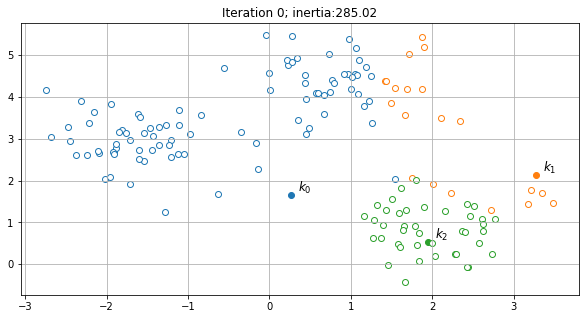

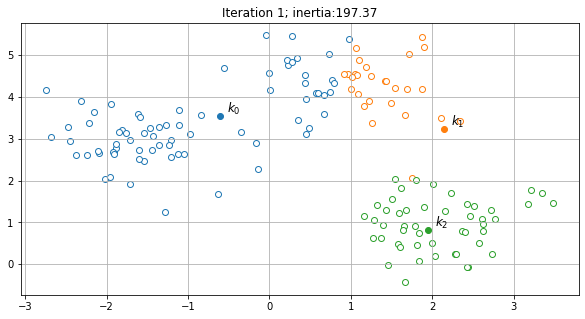

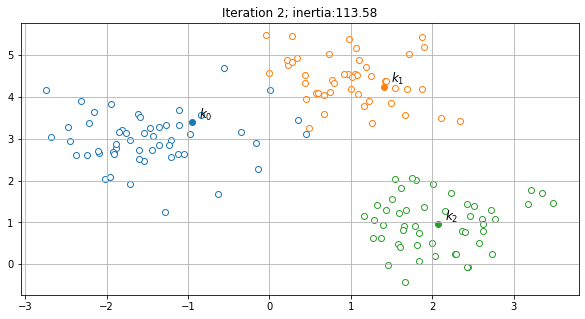

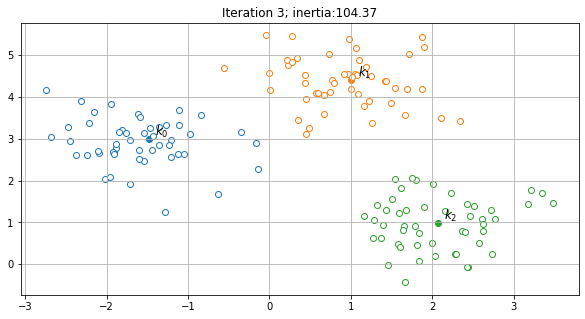

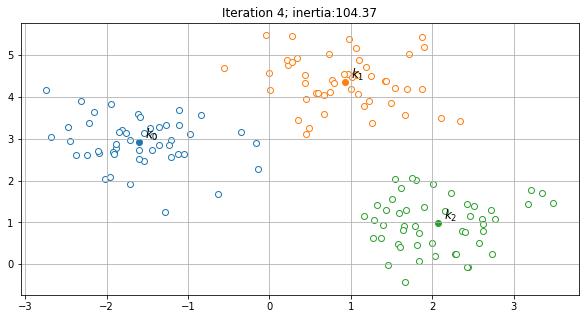

Converged after 5 iterations


In [185]:
n_iter = 20

# Initialize random centroids
k0,k1,k2 = np.random.uniform(X.mean()-X.std(), X.mean()+X.std(), size=(3,2))
prev = None  
for i in range(n_iter):
  # Compute distance from each centroid
  dk0 = np.linalg.norm(X-k0, axis=1).reshape(X.shape[0],1)
  dk1 = np.linalg.norm(X-k1, axis=1).reshape(X.shape[0],1)
  dk2 = np.linalg.norm(X-k2, axis=1).reshape(X.shape[0],1)
  dist = np.hstack((dk0,dk1,dk2))

  # Assign points to nearest centroid
  tgt_centroids = dist.argmin(axis=1)

  # plot
  plot(X, [k0,k1,k2], tgt_centroids, title=f"Iteration {i}; inertia:{inertia(X,tgt_centroids):0.2f}")
  
  # Stop if nothing changed
  if (prev==tgt_centroids).all():
    print(f"Converged after {i+1} iterations")
    break;
  else:
    prev = tgt_centroids

  # re-compute centroids based on points we just assigned to it
  k0 = X[tgt_centroids==0].mean(axis=0)
  k1 = X[tgt_centroids==1].mean(axis=0)
  k2 = X[tgt_centroids==2].mean(axis=0)

### Limitations

1. Results of k-means clustering algorithm are sensitive to initial centroids chosen that give different clustering results for different runs. The algorithm converges to local optima based on the initial centroids chosen and does not guarantee reaching the global optima.

2. Number of clusters have to be specified *a priori*. This is not usually obvious in real-world applications.

3. Clusters must be linearly separable

### k-means++ to overcome sensitivity to initial centroids

K-means++ is a mechanism to intelligenty select initial centroids to overcome limitation 1

1. Initialize an empty set $M$, to store $k$ centroids.
2. Randomly choose first centroid, $\mu^{(j)}$ from the input examples and add to $M$.
3. For each example, $x^{(i)}$, that is not in $M$, find the minimum squared distance, $d(x^{(i)},M)^2$, to any of the centroids in $M$
4. To randomly select next centroid, $\mu^{(p)}$, use weighted probability distribution equal to $\frac{d(\mu{(p)},M)^2}{\sum_{i} d(x^{(i)},M)^2}$
5. Repeat steps 2 and 3 until *k* centroids are chosen
6. Proceed with k-means

Switching to KMeans implementation in sklearn for following code.

In [186]:
from sklearn.cluster import KMeans

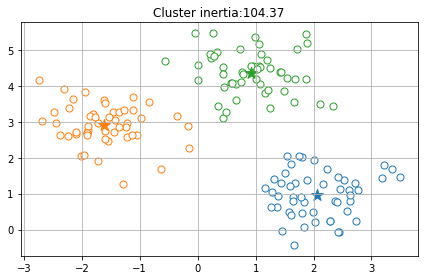

In [187]:
k = 3
km = KMeans(n_clusters=k,
            init='k-means++',
            n_init=1,
            max_iter=300,
            tol=1e-4,
            random_state=1
           )
y_km = km.fit_predict(X)
for i in range(k):
  plt.scatter(X[y_km==i,0],X[y_km==i,1],
            s=50,c='white',marker='o',edgecolor=colors[i],label=f'cluster {i}'
           )
  plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],
              s=150,c=colors[i],marker='*',edgecolor=colors[i],label=f'cluster centroid {i}'
             )
#plt.legend(loc='best')
plt.title(f"Cluster inertia:{km.inertia_:0.2f}")
plt.grid();
plt.tight_layout();

### Find optimal number of clusters

A limitation of k-means is that number of clusters must be known *a priori*. We can work around this by finding the optimal number of clusters using the elbow method. The **cluster inertia** becomes zero as *k* increases, until each point is it's own cluster. Plotting the **cluster inertia** as *k* is increased, shows the value where the distortion increases most rapidly, an elbow in the chart. The elbow is sharp, if the clusters are well separated (low cluster_std), and rounded if the clusters are not well defined (high cluster_std or very few features).

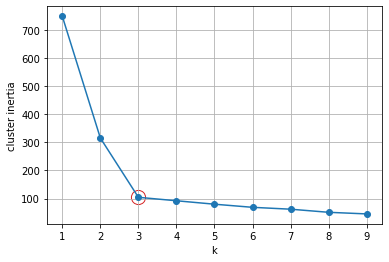

In [188]:
X,y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=.6,
                 shuffle=True,
                 random_state=0
                )
ci = []
ks = list(range(1, 10))
for k in ks:
  km = KMeans(n_clusters=k,
            init='k-means++',
            n_init=1,
            max_iter=300,
            tol=1e-4,
            random_state=1
           )
  y_km = km.fit_predict(X)
  ci.append(km.inertia_)
plt.plot(ks, ci,'o-');
plt.scatter(ks[2], ci[2],s=200,c='white',edgecolor='tab:red', marker='o');
plt.xlabel("k");
plt.ylabel("cluster inertia");
plt.grid();

### Non-linear cluster structures

Ref:[Kernel k-means](https://sites.google.com/site/dataclusteringalgorithms/kernel-k-means-clustering-algorithm)